# 1. Linear Support Vector Machine
The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear Support vector machine works on the data set for varying values of C (similar to the regularization term in linear/logistic regression). Let's load the data.

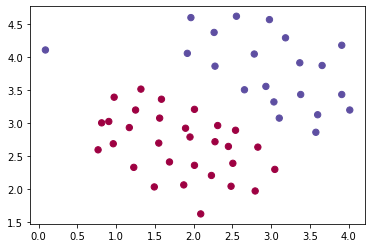

In [23]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
%matplotlib inline

# load data
raw_data = loadmat('ex6data1.mat')
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']
X = np.array(data[['X1', 'X2']])
y = np.array(data['y'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)


## Implementation
Notice that there is one outlier positive example that sits apart from the others. The classes are still linearly separable but it's a very tight fit. We're going to train a linear support vector machine to learn the class boundary. Use scikit-learn SVC to linearly classify the dataset. In svm the regularization is controled by the parameter C. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$ , where $\lambda$ is the regularization parameter that we were using previously for logistic regression. Classify the training examples with C=1 and C=100. Plot the decision boundary (or the confidence level (distance from boundary)). Explain what you observe.

In [24]:
from sklearn import svm 
#TODO: use SVC to linearly classify
#use kernel='linear', and C=[1,100] in call to SVC
svclassifier1 = svm.SVC(kernel = 'linear',C = 1,max_iter = 100)
svclassifier100 = svm.SVC(kernel = 'linear',C = 100,max_iter = 100)

svclassifier1.fit(X,y)
svclassifier100.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=100, kernel='linear', max_iter=100)

## Visualization
plot support vectors

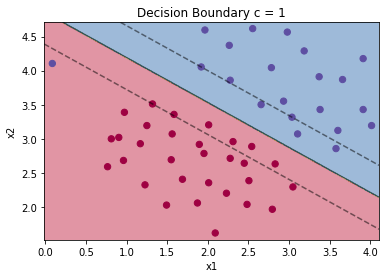

In [25]:
# Some helper functions

# Set min and max values and give it some padding
x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
h = 0.01

# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
d = np.c_[xx.ravel(), yy.ravel()]
    
# Predict the function value for the whole grid
Z = svclassifier1.predict(d)
Z = Z.reshape(xx.shape)
    
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=.5)
    
# plot the postive and negative planes
G = svclassifier1.decision_function(d)
G = G.reshape(xx.shape)
plt.contour(xx, yy, G, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
# plot support vectors
# TODO: plot the support vectors using "support_vectors_" attribute of SVC


svs = svclassifier1.support_vectors_


        
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
            
plt.title('Decision Boundary c = 1')
plt.show()

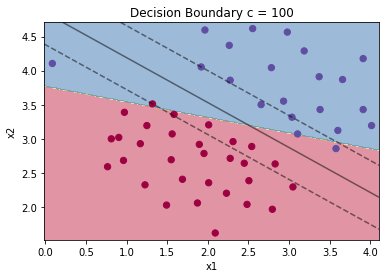

In [26]:
# with c = 100

# Predict the function value for the whole grid
Z = svclassifier100.predict(d)
Z = Z.reshape(xx.shape)
    
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=.5)
    
# plot the postive and negative planes
G = svclassifier1.decision_function(d)
G = G.reshape(xx.shape)
plt.contour(xx, yy, G, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
# plot support vectors
# TODO: plot the support vectors using "support_vectors_" attribute of SVC


svs = svclassifier100.support_vectors_


        
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
            
plt.title('Decision Boundary c = 100')
plt.show()

## Answer the following Questions
    1 What effect has the parameter C on the decision boundary?
    2 What are support vectors, why do support vectors change by changing C?
    3 Use the decision_function of SVC to find the margin of the farthest positive and farthest negative data point from the decision boundary
    

Answers
1) Small value of C will make decision boundary with large margins. Wherewas Larger values of C will reult in a decision boundary with smaller margins.

2) Support vectors are datapoints used to maximize the margin of classifier.  
When C changes the orientation of the hyperplane of decision boundary changes.

In [32]:

margins = svclassifier1.decision_function(X)
max_margin = max(margins)
min_margin = min(margins)
max_margin, min_margin
print("Maximum margin is %3f \nand the Minimum margin is %2f" % (max_margin, min_margin))

Maximum margin is 4.066743 
and the Minimum margin is -3.954332
